In [4]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import os
from pathlib import Path

notebook_path = os.path.join(os.getcwd())
data_path = Path(notebook_path).parent.joinpath('data')

# Read data
df = pd.read_csv(data_path / 'wildfires_with_geocoord.csv', parse_dates=True)

# Make grouping by unit and year - counts
grouped_count = df.groupby(['unit', 'lat', 'lon', 'year']).count()
grouped_count = grouped_count.reset_index()
grouped_count = grouped_count[['unit', 'lat', 'lon', 'year','agency']]
grouped_count = grouped_count.rename(columns={'agency':'count'})

grouped_area = df.groupby(['unit', 'lat', 'lon', 'year']).sum()
grouped_area = grouped_area.reset_index()
grouped_area = grouped_area[['unit', 'lat', 'lon', 'year', 'gis_acres']]
grouped_area = grouped_area.rename(columns={'gis_acres':'area_burned'})

grouped = pd.concat([grouped_count, grouped_area[['area_burned']]], axis=1)

grouped = grouped.sort_values('year')
grouped = grouped[grouped.year<2018]
# Save
grouped.to_csv(data_path / 'wildfires_grouped_task1.csv', index=False)

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1678/1038185377.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_area = df.groupby(['unit', 'lat', 'lon', 'year']).sum()


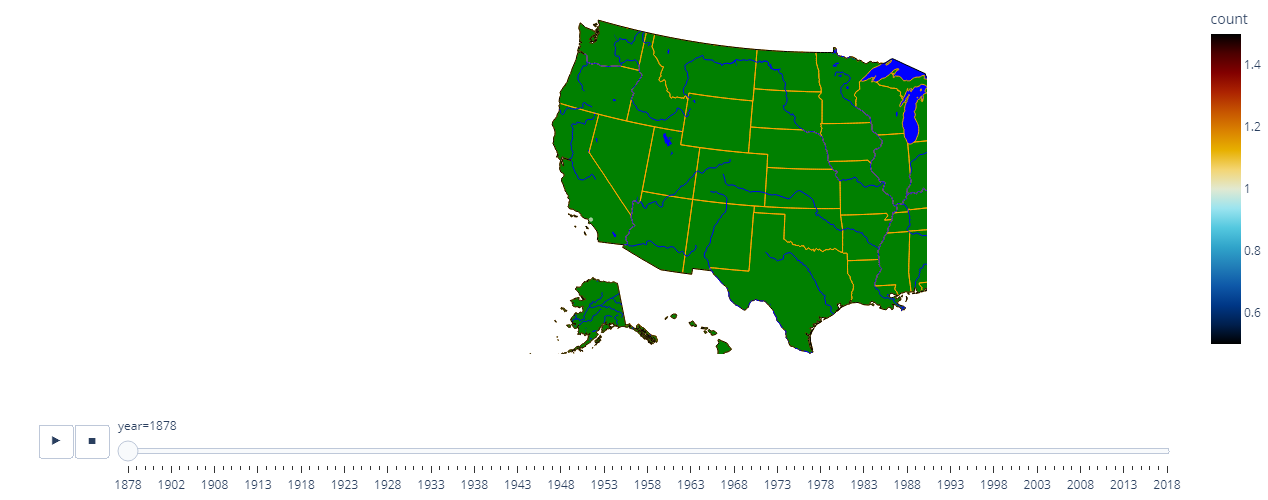

In [10]:
# plot bubble map
df = pd.read_csv('wildfires_grouped_task1.csv')
# df_ = px.data.gapminder().query("year==2007")
fig_1 = px.scatter_geo(df, lat='lat',lon='lon',
                     size="count",
                     scope='usa',
                     center={'lat':37.16611, 'lon':-119.44944},
                     # fitbounds='locations',
                     # animation_group="year",
                     animation_frame="year",
                     color_continuous_scale=px.colors.cyclical.IceFire,
                     color='count',
                     hover_data=['year', 'count'],
                     hover_name="unit",
                     # title=' Wildfires Geography over Time'
                     )
fig_1.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="Green",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Orange"
)
# fig.update_geos(fitbounds="locations")
fig_1.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig_1.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': -73, 'lat': 46 },
        'zoom': 5},
    showlegend = False)

fig_1.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig_1.show()